In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_iris

In [3]:
X , y= load_iris(return_X_y = True)

In [4]:
df = pd.DataFrame(data = X, columns = ['1', '2', '3', '4'])
df['target'] = y

In [5]:
df

,1,2,3,4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(X)

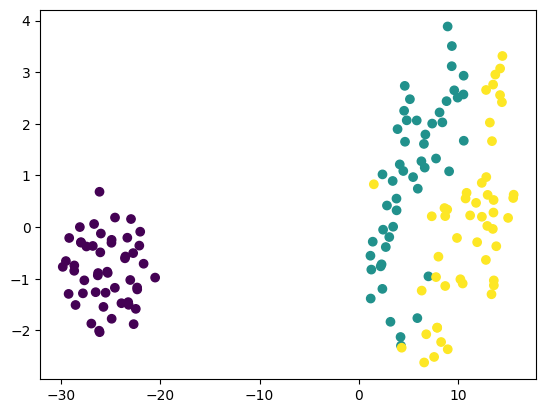

In [8]:
plt.scatter(tsne_X[:, 0], tsne_X[:, 1], c = y)

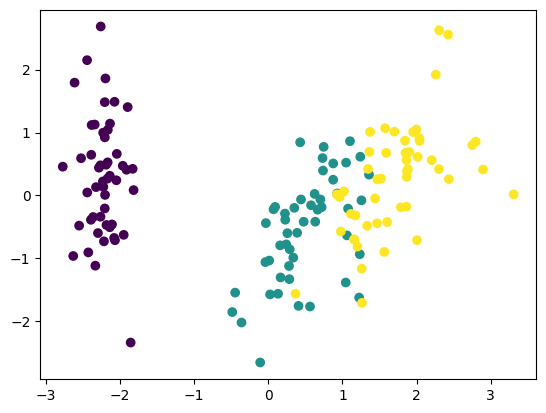

In [9]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c = y)

In [10]:
train_X, test_X, train_y, test_y = train_test_split(tsne_X, y, test_size = 0.3)

In [11]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(pca_X, y, test_size = 0.3)

In [12]:
svm = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm.fit(train_X, train_y)

SVC(kernel='linear')

In [13]:
svm2 = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm2.fit(train_X2, train_y2)

SVC(kernel='linear')

In [14]:
score = svm.score(test_X, test_y)

In [15]:
score2 = svm2.score(test_X2, test_y2)

In [16]:
score

0.9777777777777777

In [21]:
score2

0.9333333333333333

In [31]:
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 8))
    h = .02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 결정 함수 값을 계산하고, 이를 사용하여 결정 경계를 그립니다.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.colorbar(label='Decision Function Value')

    # 데이터 포인트를 시각화합니다.
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu, marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

In [32]:
plot_decision_boundary(test_X, test_y, svm, 'SVM Decision Boundary with PCA-reduced Iris Data')

ValueError: cannot reshape array of size 3026304 into shape (426,2368)

<Figure size 1000x800 with 0 Axes>

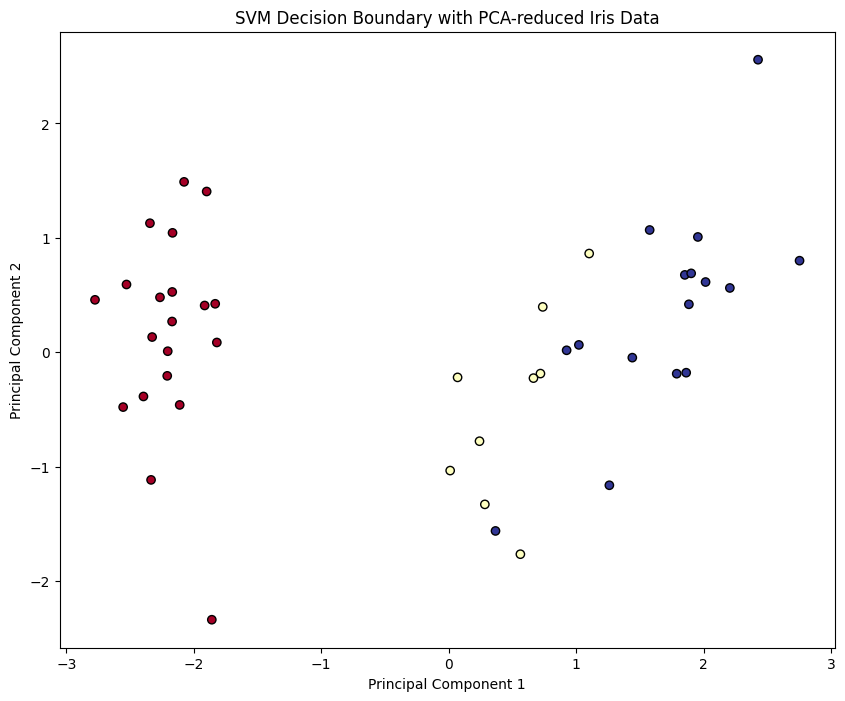

In [28]:
plot_decision_boundary(test_X2, test_y2, svm2, 'SVM Decision Boundary with PCA-reduced Iris Data')